In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns
from google.colab import data_table
data_table.enable_dataframe_formatter()
from vega_datasets import data

## **1.Perform EDA on the data.**

In [ ]:

# Load the books dataset
books = pd.read_csv('/content/FinalData.csv',encoding='latin-1')

# Load the ratings dataset
ratings = pd.read_csv('/content/ratings.csv')

In [ ]:
books.head()

,book_id,authors,title,genre
0,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama
1,2,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,Fantasy;Young-Age
2,3,Stephenie Meyer,"Twilight (Twilight, #1)",Fantasy
3,4,Harper Lee,To Kill a Mockingbird,Self-Help;Drama
4,5,F. Scott Fitzgerald,The Great Gatsby,Drama


In [ ]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,260,5
2,2,26,4
3,2,315,3
4,2,33,4


In [ ]:
#Total number of ratings
len(ratings)

3133544

In [ ]:
# Merge the two datasets on the book_id column
df = pd.merge(ratings, books, on='book_id')

# Print the first five rows of the dataset
df.head(10)

,user_id,book_id,rating,authors,title,genre
0,1,258,5,"Carlos Ruiz Zafón, Lucia Graves",The Shadow of the Wind (The Cemetery of Forgot...,Thriller;Fantasy
1,11,258,3,"Carlos Ruiz Zafón, Lucia Graves",The Shadow of the Wind (The Cemetery of Forgot...,Thriller;Fantasy
2,143,258,4,"Carlos Ruiz Zafón, Lucia Graves",The Shadow of the Wind (The Cemetery of Forgot...,Thriller;Fantasy
3,242,258,5,"Carlos Ruiz Zafón, Lucia Graves",The Shadow of the Wind (The Cemetery of Forgot...,Thriller;Fantasy
4,325,258,4,"Carlos Ruiz Zafón, Lucia Graves",The Shadow of the Wind (The Cemetery of Forgot...,Thriller;Fantasy
5,362,258,2,"Carlos Ruiz Zafón, Lucia Graves",The Shadow of the Wind (The Cemetery of Forgot...,Thriller;Fantasy
6,389,258,2,"Carlos Ruiz Zafón, Lucia Graves",The Shadow of the Wind (The Cemetery of Forgot...,Thriller;Fantasy
7,396,258,3,"Carlos Ruiz Zafón, Lucia Graves",The Shadow of the Wind (The Cemetery of Forgot...,Thriller;Fantasy
8,403,258,3,"Carlos Ruiz Zafón, Lucia Graves",The Shadow of the Wind (The Cemetery of Forgot...,Thriller;Fantasy
9,473,258,4,"Carlos Ruiz Zafón, Lucia Graves",The Shadow of the Wind (The Cemetery of Forgot...,Thriller;Fantasy


In [ ]:
#Total number of ratings
len(df)

3133544

In [ ]:
#Number of users and number of books
print(len(df['user_id'].unique()), len(df['book_id'].unique()))


53417 999


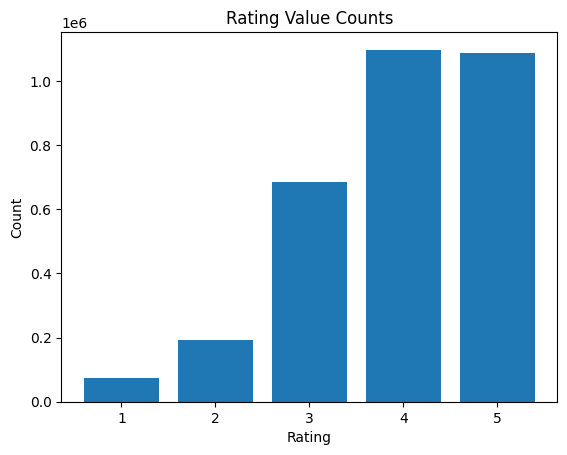

In [ ]:
#Visualisation of number of ratings for each value in rating

value_counts = df['rating'].value_counts()

# Create a bar chart
plt.bar(value_counts.index, value_counts.values)

# Set chart title and labels
plt.title('Rating Value Counts')
plt.xlabel('Rating')
plt.ylabel('Count')

# Show the chart
plt.show()

## **2. Data Preprocessing**

Before we can use the data for recommendation, we need to preprocess it. This involves removing any irrelevant columns, handling missing values, and converting categorical variables into numerical values.

In [ ]:
#Checking for null values
df.isna().sum()

user_id    0
book_id    0
rating     0
authors    0
title      0
genre      0
dtype: int64

In [ ]:
#Checking for duplicates
df.duplicated().sum()

0

In [ ]:
#list of distinct users
list_of_distinct_users = list(df['user_id'].unique())
len(list_of_distinct_users)

53417

In [ ]:
#list of distinct books
list_of_distinct_books = list(df['book_id'].unique())
len(list_of_distinct_books)

999

In [ ]:
#number of ratings given by every user
rating_users = df['user_id'].value_counts().reset_index().\
               rename({'index':'user_id','user_id':'Ratings'},axis=1)

In [ ]:
rating_users['Ratings']

0        173
1        172
2        172
3        171
4        167
        ... 
53412      1
53413      1
53414      1
53415      1
53416      1
Name: Ratings, Length: 53417, dtype: int64

In [ ]:
#number of ratings given for every book
rating_book = df['book_id'].value_counts().reset_index().\
               rename({'index':'book_id','book_id':'Ratings'},axis=1)

In [ ]:
rating_book['Ratings'].unique()

array([22806, 21850, 19088, 16931, 16604, 16549, 15953, 15855, 15657,
       15558, 15523, 15304, 15258, 15081, 14693, 14472, 14382, 14328,
       13556, 13451, 13445, 13089, 13072, 12727, 12698, 12530, 12105,
       12101, 11921, 11780, 11677, 11578, 11304, 11264, 10949, 10692,
       10649, 10394, 10361, 10312, 10308, 10175,  9977,  9960,  9712,
        9620,  9612,  9584,  9433,  9391,  9323,  9090,  9035,  8916,
        8849,  8383,  8297,  8263,  8192,  8179,  8109,  7885,  7727,
        7724,  7714,  7667,  7662,  7626,  7606,  7563,  7543,  7458,
        7214,  7192,  7110,  7040,  7002,  6944,  6899,  6861,  6854,
        6848,  6779,  6717,  6702,  6615,  6601,  6598,  6592,  6536,
        6504,  6478,  6466,  6421,  6406,  6401,  6343,  6331,  6313,
        6307,  6305,  6301,  6300,  6273,  6237,  6229,  6212,  6190,
        6135,  6102,  6082,  6039,  6034,  5990,  5973,  5897,  5864,
        5847,  5844,  5764,  5705,  5681,  5672,  5615,  5602,  5554,
        5531,  5495,

## **Content Based (using genre column of books)**

In [ ]:
#creating new binary columns for each unique genre 
genres = set()
genre_dict = {}
for genre_list in df['genre']:
    genres.update(genre_list.split(';'))
  
for genre in genres:
    df[genre] = df['genre'].apply(lambda x: int(genre in x))


df.head()

,user_id,book_id,rating,authors,title,genre,,Self-Help,Fiction,Poetry,...,Crime,Kids,Biography,Domestic,Academic,Classic,Romance,SciFi,Young-Age,Horror
0,1,258,5,"Carlos Ruiz Zafón, Lucia Graves",The Shadow of the Wind (The Cemetery of Forgot...,Thriller;Fantasy,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11,258,3,"Carlos Ruiz Zafón, Lucia Graves",The Shadow of the Wind (The Cemetery of Forgot...,Thriller;Fantasy,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,143,258,4,"Carlos Ruiz Zafón, Lucia Graves",The Shadow of the Wind (The Cemetery of Forgot...,Thriller;Fantasy,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,242,258,5,"Carlos Ruiz Zafón, Lucia Graves",The Shadow of the Wind (The Cemetery of Forgot...,Thriller;Fantasy,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,325,258,4,"Carlos Ruiz Zafón, Lucia Graves",The Shadow of the Wind (The Cemetery of Forgot...,Thriller;Fantasy,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(genres)

{'', 'Domestic', 'Drama', 'Young-Age', 'Fantasy', 'Fiction', 'Biography', 'Poetry', 'Self-Help', 'Kids', 'Thriller', 'SciFi', 'Classic', 'Psychological', 'Crime', 'Comedy', 'History', 'Horror', 'Romance', 'Academic', 'Erotic'}


In [ ]:
## First lets create a Pivot matrix

book_features_df=df.pivot_table(index='title',columns=None ,values=['Domestic', 'Drama', 'Young-Age', 'Fantasy', 'Fiction', 'Biography', 'Poetry', 'Self-Help', 'Kids', 'Thriller', 'SciFi', 'Classic', 'Psychological', 'Crime', 'Comedy', 'History', 'Horror', 'Romance', 'Academic', 'Erotic']).fillna(0)
book_features_df.head()

,Academic,Biography,Classic,Comedy,Crime,Domestic,Drama,Erotic,Fantasy,Fiction,History,Horror,Kids,Poetry,Psychological,Romance,SciFi,Self-Help,Thriller,Young-Age
title,,,,,,,,,,,,,,,,,,,,
11/22/63,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1776,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1984,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1Q84,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
"1st to Die (Women's Murder Club, #1)",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
book_features_df.shape

(998, 20)

In [ ]:
from scipy.spatial.distance import pdist,squareform,cdist

book_features_df_matrix = (book_features_df.values)

idx = np.random.choice(book_features_df.shape[0])
print('index of the book :{0}'.format(idx))
# Get the vector to compare
vector_to_compare = book_features_df_matrix[idx]

# Calculate the Jaccard distance between the selected vector and all others
jaccard_dist = cdist([vector_to_compare], book_features_df_matrix, metric='jaccard')[0]

# Find the indices of the 5 closest vectors
closest_indices = np.argsort(jaccard_dist)[1:6]
# Print the closest vectors and their distances
print("Best recommendations for the book ",book_features_df.index[idx], "are:")
for idx in range(0,len(closest_indices)):
    print('{0} : {1}'.format(idx+1,book_features_df.index[closest_indices[idx]]))
    


index of the book :686
Best recommendations for the book  The Giving Tree are:
1 : Curious George
2 : Dr. Seuss's Green Eggs and Ham: For Soprano, Boy Soprano, and Orchestra
3 : Where the Red Fern Grows
4 : Bridge to Terabithia
5 : The Undomestic Goddess


## **Model based (KNN)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
#Create a new dataframe with userId,bookID and ratings
knn_data = df[['user_id','book_id','rating']]
knn_data.head()

,user_id,book_id,rating
0,1,258,5
1,11,258,3
2,143,258,4
3,242,258,5
4,325,258,4


In [ ]:
# Split the data into train and test sets
train_data, test_data = train_test_split(knn_data, test_size=0.2, random_state=42)

In [ ]:
# Define the feature and target columns
feature_cols = ['user_id', 'book_id']
target_col = 'rating'

In [ ]:
# Create the feature and target arrays for train and test sets
X_train = train_data[feature_cols].values
y_train = train_data[target_col].values
X_test = test_data[feature_cols].values
y_test = test_data[target_col].values

In [ ]:
# Train a kNN model on the train set
k = 5  # number of neighbors
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Use the trained model to predict on the test set
y_pred = model.predict(X_test)

In [ ]:
# Calculate the MAE and RMSE on the test set
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the metric
print("Model Performance :")
print('MAE:', mae)
print('RMSE:', rmse)

Model Performance :
MAE: 0.8596672458828577
RMSE: 1.07753202633971


## **Hybrid**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Load the ratings dataset
books_df= pd.read_csv('/content/FinalData.csv',encoding='latin-1')

# Load the movies dataset
ratings_df = pd.read_csv('/content/ratings.csv')

In [ ]:
#Reduce the dataset for faster computation
movies_df=books_df.query('book_id < 500')
ratings_df=ratings_df.query('book_id < 500')

In [ ]:
#calculate average rating for each book
ratings_mean_df = ratings_df.groupby(['book_id'], as_index=False, sort=False).mean().rename(columns={'rating':'rating_mean'})[['book_id','rating_mean']]
ratings_mean_df.head()

,book_id,rating_mean
0,258,4.105919
1,260,3.894737
2,26,3.620946
3,315,3.399781
4,33,4.001327


In [ ]:
#Merging both the datasets
books_df = pd.merge(books_df,ratings_mean_df,on=['book_id'])

In [ ]:
books_df.head()

,book_id,authors,title,genre,rating_mean
0,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,4.279707
1,2,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,Fantasy;Young-Age,4.351350
2,3,Stephenie Meyer,"Twilight (Twilight, #1)",Fantasy,3.214341
3,4,Harper Lee,To Kill a Mockingbird,Self-Help;Drama,4.329369
4,5,F. Scott Fitzgerald,The Great Gatsby,Drama,3.772224


In [ ]:
#Build a dataframe with information about genres
books_df['genre'] = books_df['genre'].str.split(';')
books_with_genres_df = books_df.copy()
for index, row in books_df.iterrows():
    for genre in row['genre']:
        books_with_genres_df.at[index, genre] = 1
books_with_genres_df = books_with_genres_df.fillna(0)
books_with_genres_df.head()

,book_id,authors,title,genre,rating_mean,SciFi,Drama,Fantasy,Young-Age,Self-Help,...,Fiction,Psychological,Domestic,Erotic,Poetry,Kids,Horror,Comedy,Academic,
0,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)","[SciFi, Drama]",4.279707,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,"[Fantasy, Young-Age]",4.351350,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Stephenie Meyer,"Twilight (Twilight, #1)",[Fantasy],3.214341,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Harper Lee,To Kill a Mockingbird,"[Self-Help, Drama]",4.329369,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,F. Scott Fitzgerald,The Great Gatsby,[Drama],3.772224,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#build a vectors of vectors for genres
genres_df = books_with_genres_df.drop(columns=['book_id','title','genre','rating_mean','authors'])
genres_matrix = genres_df.to_numpy()

In [ ]:
#Content based similarity  
genres_similarity = cosine_similarity(genres_matrix)
ratings_matrix = ratings_df.pivot(index='book_id', columns='user_id', values='rating').fillna(0).to_numpy()

#Collaborative based similarity based on user's ratings
ratings_similarity = cosine_similarity(ratings_matrix)

#Hybrid Model
hybrid_similarity = (genres_similarity + ratings_similarity) / 2
hybrid_similarity_df = pd.DataFrame(hybrid_similarity, columns=ratings_df['book_id'].unique(), index=ratings_df['book_id'].unique())

In [ ]:
def get_book_recommendations(book_title, num_recommendations=5):
    book_id = books_df.loc[books_df['title'] == book_title]['book_id'].values[0]
    book_similarity = hybrid_similarity_df[book_id]
    similar_books = book_similarity.sort_values(ascending=False)[1:num_recommendations+1]
    recommended_books = books_df.loc[books_df['book_id'].isin(similar_books.index)]
    return recommended_books[['title', 'genre', 'rating_mean']]

In [ ]:
book = input("Enter a book title :")
get_book_recommendations(book)

Enter a book title :Eat, Pray, Love


,title,genre,rating_mean
22,Harry Potter and the Chamber of Secrets (Harry...,"[Fantasy, Young-Age]",4.229418
32,Memoirs of a Geisha,[Biography],4.001327
183,Matilda,"[Kids, Fantasy]",4.222037
221,"The Bourne Identity (Jason Bourne, #1)","[Thriller, Fiction]",4.000324
370,Stranger in a Strange Land,[Fantasy],3.870673
